<a href="https://colab.research.google.com/github/felicia2025-hue/Telco-Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

In [20]:
import pandas as pd

PATH = "/content/Telco customer churn dataset.csv"
df = pd.read_csv(PATH)

print("=== SHAPE (rows, cols) ===")
print(df.shape)

print("\n=== DATA TYPES ===")
print(df.dtypes)

# Numeric summary
num_cols = df.select_dtypes(include="number").columns.tolist()
if num_cols:
    print("\n=== NUMERIC SUMMARY ===")
    print(df[num_cols].describe().T)

# Categorical cardinality
cat_cols = df.select_dtypes(exclude="number").columns.tolist()
if cat_cols:
    print("\n=== CATEGORICAL CARDINALITY ===")
    card = pd.DataFrame({
        "column": cat_cols,
        "n_unique": [df[c].nunique(dropna=True) for c in cat_cols]
    }).sort_values("n_unique", ascending=False)
    print(card)


=== SHAPE (rows, cols) ===
(7043, 53)

=== DATA TYPES ===
customer_id                           object
gender                                object
age                                    int64
under_30                              object
senior_citizen                        object
partner                               object
dependents                            object
number_of_dependents                   int64
married                               object
country                               object
state                                 object
city                                  object
zip_code                               int64
total_population                       int64
latitude                             float64
longitude                            float64
phone_service_x                       object
internet_service_x                    object
online_security                       object
online_backup                         object
device_protection                     obje

In [2]:
# Separate columns by data type
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()

# Print the counts
print(f"Number of numerical columns   : {len(num_cols)}")
print(f"Number of categorical columns : {len(cat_cols)}")

Number of numerical columns   : 20
Number of categorical columns : 33


# **Data Preprocessing**

### Data Cleaning

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

PATH = "/content/Customer_Dataset.csv"
TARGET = None  # e.g. "Churn"

df = pd.read_csv(PATH).copy()

# --- CHECK FIRST ---
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

# Missing values: count only
na_info = df.isna().sum()
na_info = na_info[na_info > 0].sort_values(ascending=False)

if not na_info.empty:
    print("\n=== Missing Values by Column ===")
    print(na_info.to_frame(name="n_missing"))
else:
    print("\nNo missing values found.")


Duplicate rows: 0

=== Missing Values by Column ===
               n_missing
churn_reason        5174
offer               3877
internet_type       1526


In [22]:
# --- Handle ---
# 1) Drop duplicates (if any)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)

# 2) Impute missing
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()

# Categorical -> "Unknown"
if cat_cols:
    df[cat_cols] = df[cat_cols].fillna("Unknown")

# --- Check again after cleaning ---
dup_after = df.duplicated().sum()
na_after = df.isna().sum().sum()

if dup_after == 0 and na_after == 0:
    print("\n✅ Data is cleaned: no duplicates & no missing values remain.")
else:
    print("\n⚠️ Data still has issues:")
    print(f"- Remaining duplicates: {dup_after}")
    print(f"- Remaining missing values: {na_after}")


✅ Data is cleaned: no duplicates & no missing values remain.


### Data Transformation

In [23]:
# --- Transform ---
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()

# One-hot encode categoricals
X_cat = pd.get_dummies(df[cat_cols], drop_first=False) if cat_cols else pd.DataFrame(index=df.index)

# Scale numeric columns
if num_cols:
    scaler = StandardScaler()
    X_num = pd.DataFrame(
        scaler.fit_transform(df[num_cols]),
        columns=num_cols,
        index=df.index
    )
else:
    X_num = pd.DataFrame(index=df.index)

# Combine numeric + categorical
df_transformed = pd.concat([X_num, X_cat], axis=1)

# --- Output info ---
print("✅ Data transformation completed!")
print("Transformed shape:", df_transformed.shape)

# Show a small sample
print("\n=== Preview of Transformed Data ===")
print(df_transformed.head())

✅ Data transformation completed!
Transformed shape: (7043, 8262)

=== Preview of Transformed Data ===
        age  number_of_dependents  zip_code  total_population  latitude  \
0 -0.567773             -0.486835 -0.140615         -0.834102 -0.554852   
1 -0.030433             -0.486835 -1.228066          0.432950 -0.824278   
2  0.208385             -0.486835 -0.462703          1.887845 -1.033632   
3  1.880110             -0.486835  0.574657          1.160114  0.736000   
4  1.700997             -0.486835 -0.256416          0.979316 -0.797815   

   longitude  monthly_ charges  avg_monthly_long_distance_charges  \
0   0.351678          0.027862                           1.257916   
1   0.720807         -0.161583                          -0.794260   
2   0.851364          0.303720                           0.692111   
3  -1.094917          1.104706                           0.314692   
4   0.314157          0.636080                          -1.008541   

   total_charges  total_refunds 

# **Explanatory Data Analysis**

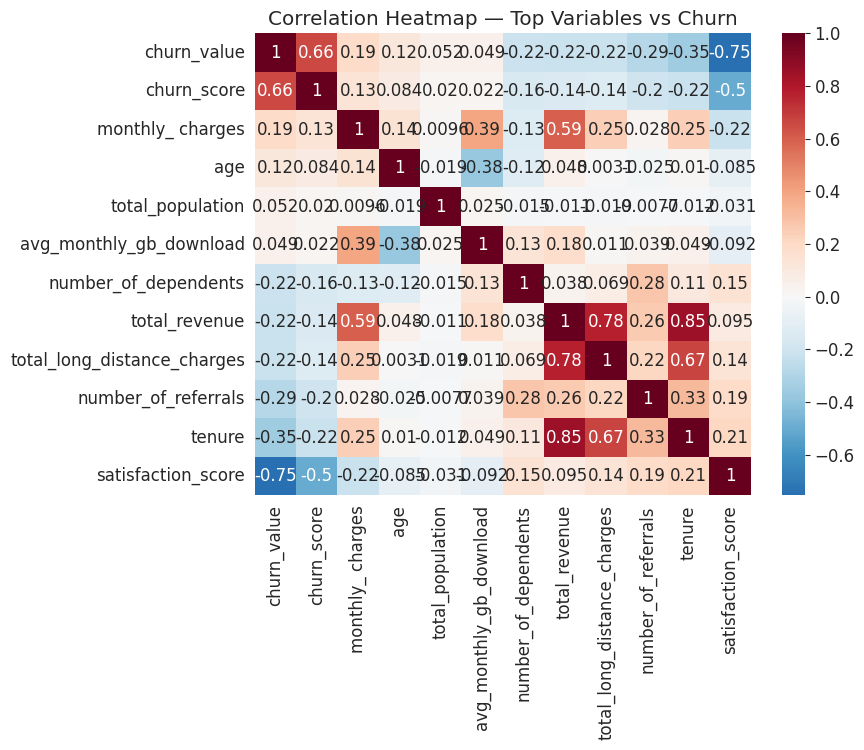

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
corr_with_churn = df.corr(numeric_only=True)["churn_value"].sort_values(ascending=False)

top10_corr = pd.concat([
    corr_with_churn.head(6),
    corr_with_churn.tail(6)
])

# Heatmap correlation for Top-10 variables with churn_value
top_vars = top10_corr.index.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[top_vars].corr(numeric_only=True), annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap — Top Variables vs Churn")
plt.show()

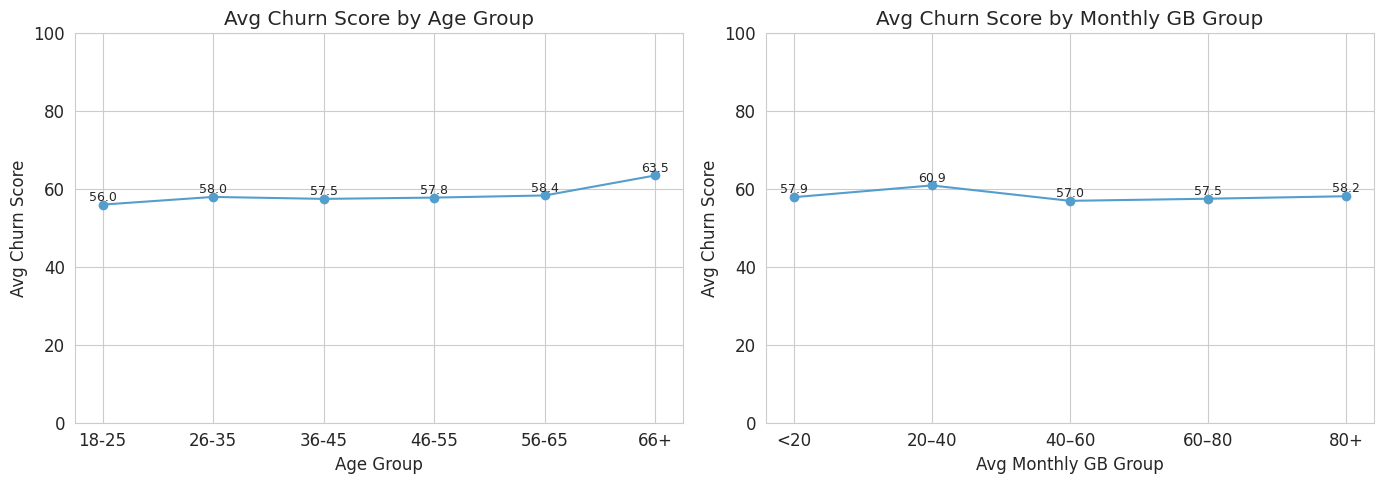

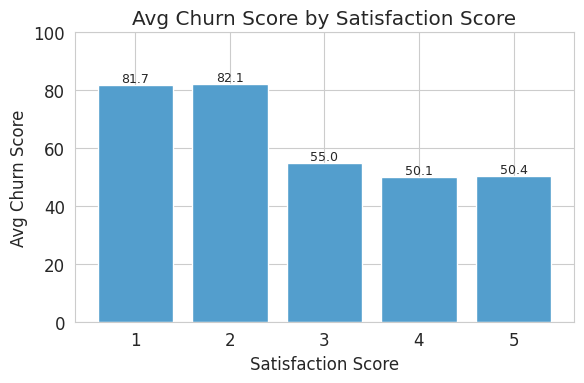

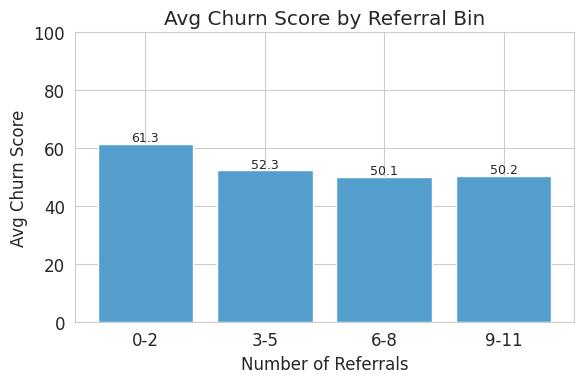

/tmp/ipython-input-3011422348.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offer_tab.index, y=offer_tab.values, palette=palette)


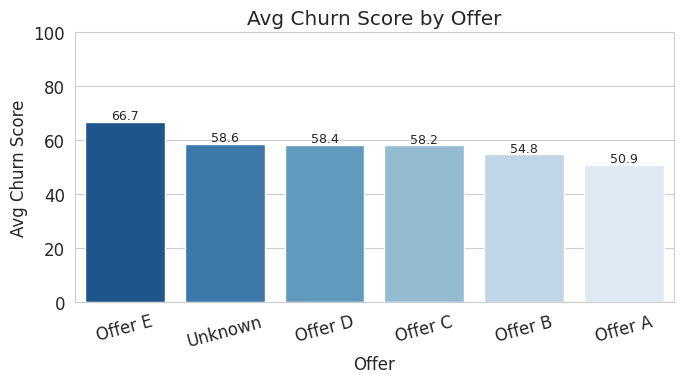


Avg Churn Score — Age Group:
 age_group
18-25    56.0
26-35    58.0
36-45    57.5
46-55    57.8
56-65    58.4
66+      63.5
Name: churn_score, dtype: float64

Avg Churn Score — GB Group:
 gb_group
<20      57.9
20–40    60.9
40–60    57.0
60–80    57.5
80+      58.2
Name: churn_score, dtype: float64

Avg Churn Score — Satisfaction:
 satisfaction_score
1    81.7
2    82.1
3    55.0
4    50.1
5    50.4
Name: churn_score, dtype: float64

Avg Churn Score — Referral Bin:
 referral_bin
0-2     61.3
3-5     52.3
6-8     50.1
9-11    50.2
12+      NaN
Name: churn_score, dtype: float64

Avg Churn Score — Offer:
 offer
Offer E    66.7
Unknown    58.6
Offer D    58.4
Offer C    58.2
Offer B    54.8
Offer A    50.9
Name: churn_score, dtype: float64


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
palette = sns.color_palette("Blues_r")

# --- Guards & casting ---
need = {"churn_score", "churn_value", "age", "avg_monthly_gb_download", "satisfaction_score", "number_of_referrals", "offer"}
missing = need - set(df.columns)
if missing:
    raise ValueError(f"Kolom wajib hilang: {missing}")

dfp = df.copy()
for c in need:
    if c in ["offer"]: continue
    dfp[c] = pd.to_numeric(dfp[c], errors="coerce")

# keep only valid rows
dfp = dfp.dropna(subset=["churn_score", "age", "avg_monthly_gb_download", "satisfaction_score", "number_of_referrals"])
dfp["number_of_referrals"] = dfp["number_of_referrals"].clip(lower=0).astype(int)
dfp["churn_score"] = dfp["churn_score"].clip(0, 100)

# --- Binning ---
dfp["age_group"] = pd.cut(
    dfp["age"],
    bins=[17, 25, 35, 45, 55, 65, 120],
    labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66+"],
    include_lowest=True, right=True
)
dfp["gb_group"] = pd.cut(
    dfp["avg_monthly_gb_download"],
    bins=[-1, 20, 40, 60, 80, np.inf],
    labels=["<20", "20–40", "40–60", "60–80", "80+"],
    include_lowest=True, right=True
)
ref_bins = [-0.5, 2, 5, 8, 11, np.inf]
ref_labels = ["0-2", "3-5", "6-8", "9-11", "12+"]
dfp["referral_bin"] = pd.cut(dfp["number_of_referrals"], bins=ref_bins, labels=ref_labels, include_lowest=True)

# --- Aggregation ---
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]
age_grp = dfp.groupby("age_group", observed=True)["churn_score"].mean().reindex(age_labels)

gb_labels = ["<20", "20–40", "40–60", "60–80", "80+"]
gb_grp = dfp.groupby("gb_group", observed=True)["churn_score"].mean().reindex(gb_labels)

sat_tab = dfp[dfp["satisfaction_score"].between(1, 5)].groupby("satisfaction_score")["churn_score"].mean().reindex([1, 2, 3, 4, 5])

ref_tab = dfp.groupby("referral_bin", observed=True)["churn_score"].mean().reindex(ref_labels)

# --- PLOTS ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age
axes[0].plot(age_grp.index.astype(str), age_grp.values, marker="o", color=palette[2])
for i, v in enumerate(age_grp.values):
    if pd.notna(v): axes[0].text(i, v+1, f"{v:.1f}", ha="center", fontsize=9)
axes[0].set_title("Avg Churn Score by Age Group")
axes[0].set_xlabel("Age Group"); axes[0].set_ylabel("Avg Churn Score"); axes[0].set_ylim(0, 100)

# GB
axes[1].plot(gb_grp.index.astype(str), gb_grp.values, marker="o", color=palette[2])
for i, v in enumerate(gb_grp.values):
    if pd.notna(v): axes[1].text(i, v+1, f"{v:.1f}", ha="center", fontsize=9)
axes[1].set_title("Avg Churn Score by Monthly GB Group")
axes[1].set_xlabel("Avg Monthly GB Group"); axes[1].set_ylabel("Avg Churn Score"); axes[1].set_ylim(0, 100)

plt.tight_layout(); plt.show()

# BAR — Satisfaction Score
plt.figure(figsize=(6, 4))
bars = plt.bar([str(i) for i in sat_tab.index], sat_tab.values, color=palette[2])
for b, v in zip(bars, sat_tab.values):
    if pd.notna(v): plt.text(b.get_x() + b.get_width()/2, v + 1, f"{v:.1f}", ha="center", fontsize=9)
plt.ylim(0, 100); plt.xlabel("Satisfaction Score"); plt.ylabel("Avg Churn Score")
plt.title("Avg Churn Score by Satisfaction Score")
plt.tight_layout(); plt.show()

# BAR — Referral
plt.figure(figsize=(6, 4))
bars = plt.bar(ref_tab.index.astype(str), ref_tab.values, color=palette[2])
for b, v in zip(bars, ref_tab.values):
    if pd.notna(v): plt.text(b.get_x() + b.get_width()/2, v + 1, f"{v:.1f}", ha="center", fontsize=9)
plt.ylim(0, 100); plt.xlabel("Number of Referrals"); plt.ylabel("Avg Churn Score")
plt.title("Avg Churn Score by Referral Bin")
plt.tight_layout(); plt.show()

# OFFER
offer_tab = dfp.groupby("offer", observed=True)["churn_score"].mean().sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=offer_tab.index, y=offer_tab.values, palette=palette)
plt.title("Avg Churn Score by Offer")
plt.ylabel("Avg Churn Score"); plt.xlabel("Offer")
plt.ylim(0, 100)
for i, v in enumerate(offer_tab.values):
    plt.text(i, v + 1, f"{v:.1f}", ha="center", fontsize=9)
plt.xticks(rotation=15)
plt.tight_layout(); plt.show()

print("\nAvg Churn Score — Age Group:\n", age_grp.round(1))
print("\nAvg Churn Score — GB Group:\n", gb_grp.round(1))
print("\nAvg Churn Score — Satisfaction:\n", sat_tab.round(1))
print("\nAvg Churn Score — Referral Bin:\n", ref_tab.round(1))
print("\nAvg Churn Score — Offer:\n", offer_tab.round(1))

/tmp/ipython-input-2283913550.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["churn_value"]==0,"monthly_ charges"], shade=True, color="#87CEFA", label="No Churn")
/tmp/ipython-input-2283913550.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["churn_value"]==1,"monthly_ charges"], shade=True, color="#1E3A8A", label="Churn")


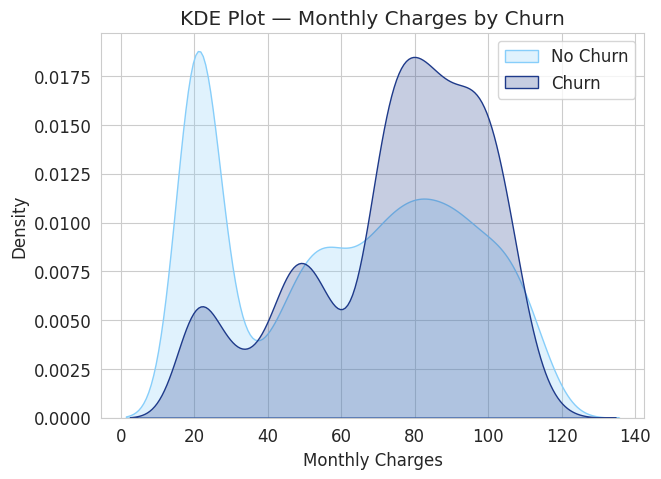

💸 Estimated Monthly Revenue Lost due to Churn: 139,130.85


In [26]:
# Average monthly charges by churn
rev_churn = df.groupby("churn_value")["monthly_ charges"].mean()

plt.figure(figsize=(7,5))
sns.kdeplot(df.loc[df["churn_value"]==0,"monthly_ charges"], shade=True, color="#87CEFA", label="No Churn")
sns.kdeplot(df.loc[df["churn_value"]==1,"monthly_ charges"], shade=True, color="#1E3A8A", label="Churn")
plt.title("KDE Plot — Monthly Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()

# Potential lost revenue estimation
lost_revenue = df.loc[df["churn_value"]==1, "monthly_ charges"].sum()
print(f"💸 Estimated Monthly Revenue Lost due to Churn: {lost_revenue:,.2f}")

skip: monthly_charge missing


/tmp/ipython-input-2869394394.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = g.groupby(bins)["churn_value"].mean()
/tmp/ipython-input-2869394394.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = g.groupby(bins)["churn_value"].mean()
/tmp/ipython-input-2869394394.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = g.groupby(bins)["churn_value"].mean()
/tmp/ipython-input-2869394394.py:12: FutureWarnin

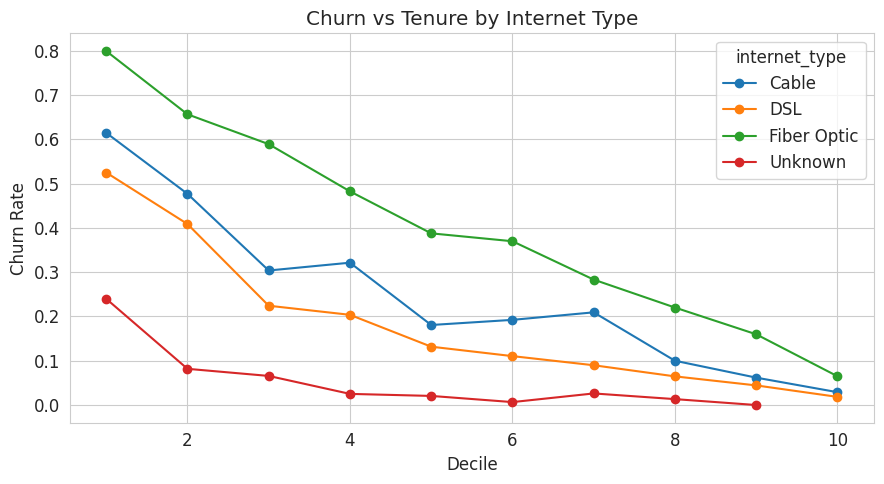

skip: charge_per_gb missing


In [27]:
def churn_decile_curve(df, num_col, q=10, seg_col=None, title=None):
    if num_col not in df.columns:
        print(f"skip: {num_col} missing"); return
    x = df[[num_col, "churn_value"]].dropna().copy()
    # winsorize ringan
    x[num_col] = x[num_col].clip(x[num_col].quantile(.01), x[num_col].quantile(.99))
    if seg_col and seg_col in df.columns:
        plt.figure(figsize=(9,5))
        for lv, g in x.join(df[seg_col]).dropna(subset=[seg_col]).groupby(seg_col):
            try:
                bins = pd.qcut(g[num_col], q=q, duplicates="drop")
                s = g.groupby(bins)["churn_value"].mean()
                plt.plot(range(1,len(s)+1), s.values, marker="o", label=str(lv))
            except Exception:
                continue
        plt.legend(title=seg_col)
        plt.title(title or f"Churn vs {num_col} (deciles) — segmented by {seg_col}")
    else:
        bins = pd.qcut(x[num_col], q=q, duplicates="drop")
        s = x.groupby(bins)["churn_value"].mean()
        plt.figure(figsize=(8,4))
        plt.plot(range(1,len(s)+1), s.values, marker="o")
        plt.title(title or f"Churn vs {num_col} (deciles)")
    plt.xlabel("Decile"); plt.ylabel("Churn Rate")
    plt.tight_layout(); plt.show()

# contoh:
churn_decile_curve(df, "monthly_charge", seg_col="contract", title="Churn vs Monthly Charge by Contract")
churn_decile_curve(df, "tenure", seg_col="internet_type", title="Churn vs Tenure by Internet Type")
churn_decile_curve(df, "charge_per_gb", title="Churn vs Charge per GB")

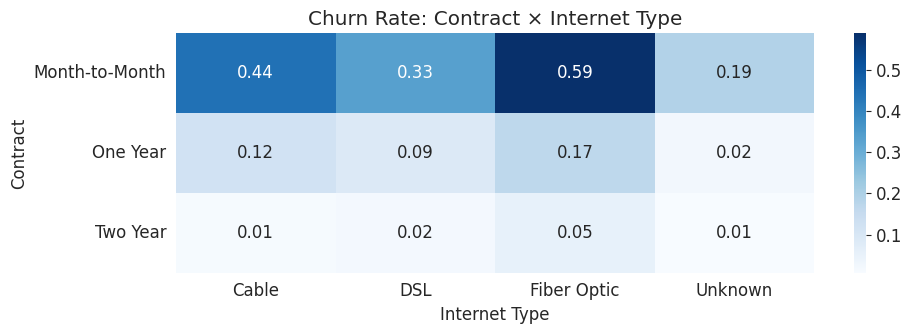

In [28]:
# Churn Rate by Contract & Internet Type
plt.figure(figsize=(10, 3.5))
sns.heatmap(
    df.pivot_table(index="contract", columns="internet_type", values="churn_value", aggfunc="mean"),
    annot=True, fmt=".2f", cmap="Blues"
)
plt.title("Churn Rate: Contract × Internet Type")
plt.xlabel("Internet Type")
plt.ylabel("Contract")
plt.tight_layout()
plt.show()


Top churn reasons:
                                 Churn Reason  Count  Share(%)
0               Competitor had better devices    313     16.75
1                Competitor made better offer    311     16.64
2                  Attitude of support person    220     11.77
3                                  Don't know    130      6.96
4                Competitor offered more data    117      6.26
5   Competitor offered higher download speeds    100      5.35
6                Attitude of service provider     94      5.03
7                              Price too high     78      4.17
8                     Product dissatisfaction     77      4.12
9                         Network reliability     72      3.85
10                      Long distance charges     64      3.42
11                    Service dissatisfaction     63      3.37
12                                      Moved     46      2.46
13                         Extra data charges     39      2.09
14                  Limited range o

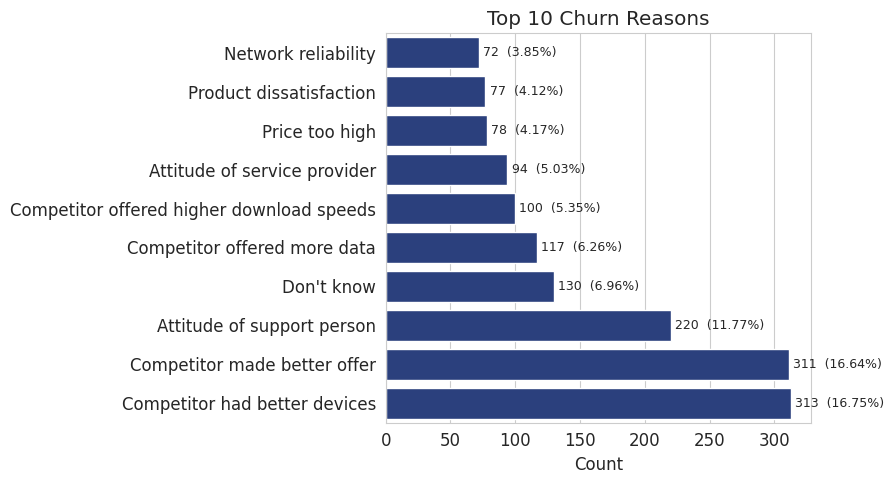

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIG ---
REASON_COL_CANDIDATES = ["churn_reason", "Churn Reason", "reason"]
CHURN_FLAG_CANDS = [("churn_value", 1), ("churn_label", "Yes"), ("customer_status", "Churned")]

# --- 1) Pick columns robustly ---
reason_col = next((c for c in REASON_COL_CANDIDATES if c in df.columns), None)
if reason_col is None:
    raise ValueError("Churn reason column not found. Tried: " + ", ".join(REASON_COL_CANDIDATES))

# Determine churned subset using whichever flag exists
mask = pd.Series(True, index=df.index)
found_flag = False
for col, positive in CHURN_FLAG_CANDS:
    if col in df.columns:
        found_flag = True
        if isinstance(positive, str):
            mask &= df[col].astype(str).str.strip().str.lower() == str(positive).lower()
        else:
            mask &= pd.to_numeric(df[col], errors="coerce").fillna(-1).astype(float) == float(positive)
if not found_flag:
    # If no churn flag present, use all rows (or raise)
    print("Warning: no churn flag column found; counting reasons on all rows.")

# --- 2) Clean & count reasons ---
reasons = (df.loc[mask, reason_col]
             .astype(str)
             .str.strip()
             .replace({"": np.nan, "nan": np.nan, "None": np.nan, "NaN": np.nan}))
reasons = reasons.fillna("Unknown / Not Provided")

counts = (reasons.value_counts(dropna=False)
                  .rename_axis("Churn Reason")
                  .reset_index(name="Count"))
counts["Share(%)"] = (counts["Count"] / counts["Count"].sum() * 100).round(2)

print("\nTop churn reasons:")
print(counts.head(15))

# --- 3) Plot (Top 10) ---
topN = 10
plot_df = counts.head(topN).sort_values("Count")  # sort for nice horizontal bars

sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))
sns.barplot(data=plot_df, y="Churn Reason", x="Count", color="#1E3A8A")
for i, (cnt, share) in enumerate(zip(plot_df["Count"], plot_df["Share(%)"])):
    plt.text(cnt + max(counts["Count"])*0.01, i, f"{cnt}  ({share}%)", va="center", fontsize=9)
plt.title(f"Top {topN} Churn Reasons")
plt.xlabel("Count"); plt.ylabel("")
plt.tight_layout(); plt.show()


# **Machine Learning**

In [30]:
# Split Data
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

TARGET = "churn_value"

if TARGET in df.columns and df[TARGET].dtype == "object":
    df[TARGET] = df[TARGET].str.strip().str.lower().map({"yes": 1, "no": 0})

if TARGET not in df.columns:
    raise ValueError(f"Target '{TARGET}' not found. Available: {df.columns.tolist()}")
if df[TARGET].nunique() != 2:
    raise ValueError(f"Target '{TARGET}' must be binary. Got uniques={df[TARGET].unique()}")

leakage_cols = [
    "churn_score", "churn_label", "customer_status",
    "churn_category", "churn_reason", "customer_id", TARGET
]

present_leaks = [c for c in leakage_cols if c in df.columns]
print("Dropping leakage columns:", present_leaks)

X = df.drop(columns=present_leaks)
y = df[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Split completed")
print("X_train:", X_train.shape, "| X_test:", X_test.shape, "| churn rate train:", y_train.mean())

Dropping leakage columns: ['churn_score', 'churn_label', 'customer_status', 'churn_category', 'churn_reason', 'customer_id', 'churn_value']
✅ Split completed
X_train: (5634, 46) | X_test: (1409, 46) | churn rate train: 0.2653532126375577


In [31]:
# --- TRAIN MODELS ---
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn

try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

ohe = (OneHotEncoder(handle_unknown="ignore", sparse_output=False)
       if sklearn.__version__ >= "1.2"
       else OneHotEncoder(handle_unknown="ignore", sparse=False))

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop"
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced"),
}
if HAS_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1, eval_metric="logloss"
    )

trained = {}
for name, clf in models.items():
    pipe = Pipeline([("preprocess", preprocess), ("model", clf)])
    pipe.fit(X_train, y_train)
    trained[name] = pipe
    print(f"✅ Trained {name}")

✅ Trained Logistic Regression
✅ Trained Decision Tree
✅ Trained Random Forest
✅ Trained XGBoost


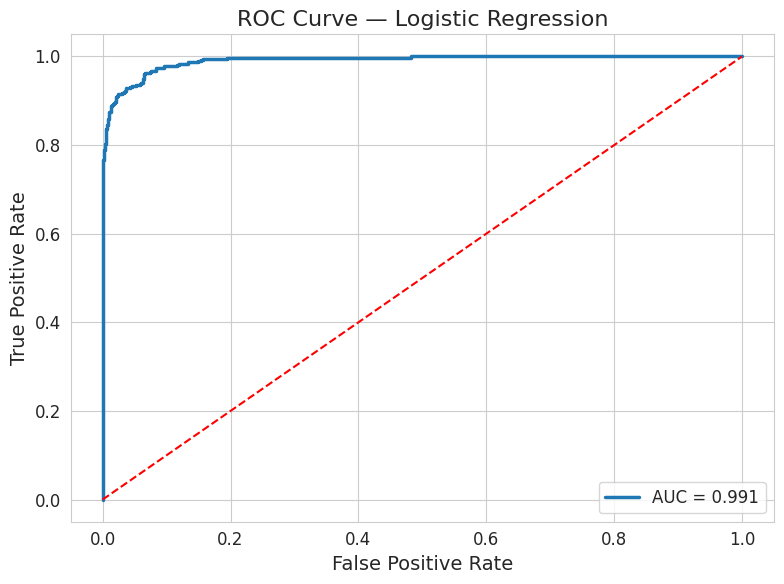

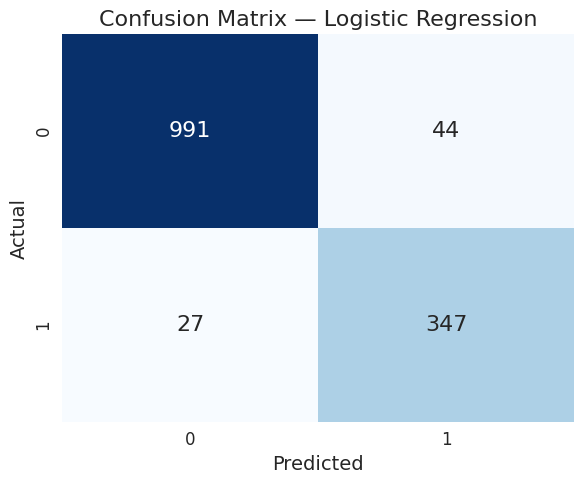

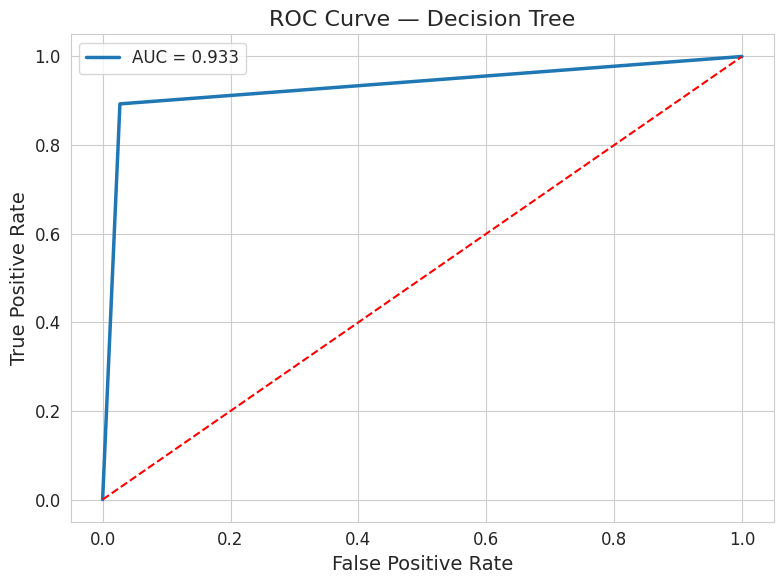

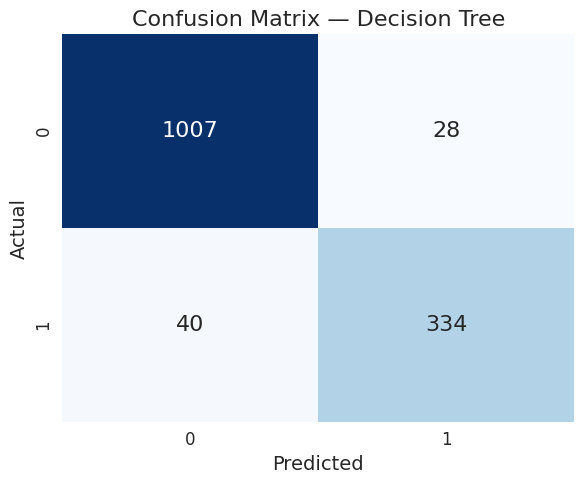

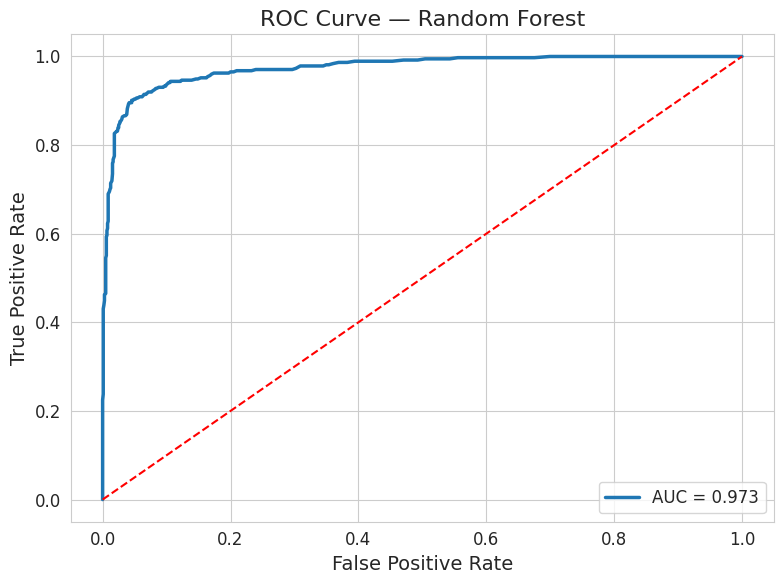

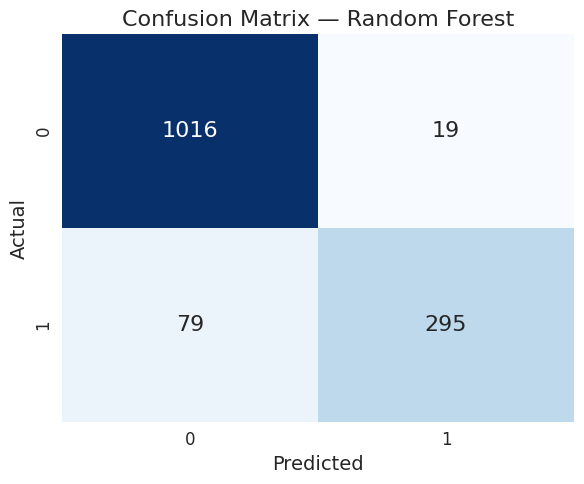

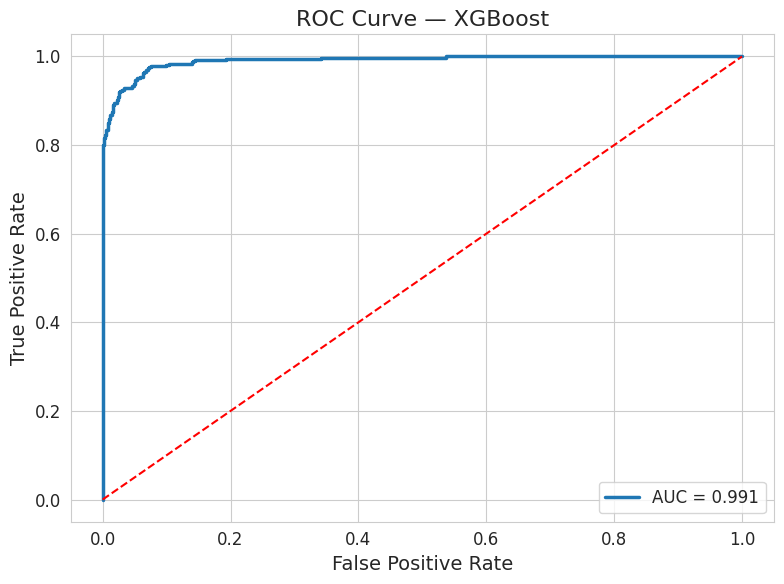

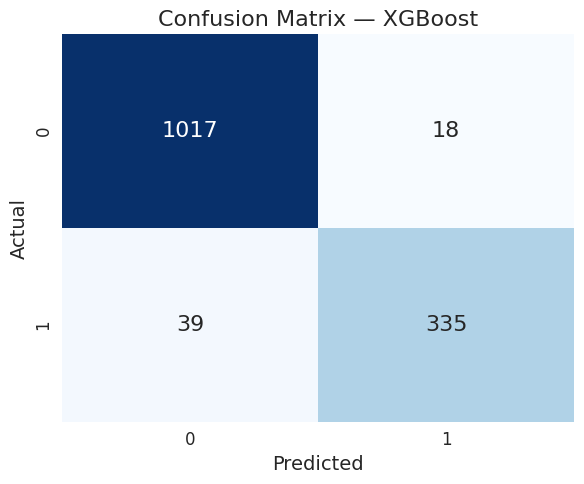


=== Model Performance (sorted by ROC_AUC) ===
                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
0  Logistic Regression  0.949610   0.887468  0.927807  0.907190  0.990713
3              XGBoost  0.959546   0.949008  0.895722  0.921596  0.990700
2        Random Forest  0.930447   0.939490  0.788770  0.857558  0.973495
1        Decision Tree  0.951739   0.922652  0.893048  0.907609  0.932997


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)

plt.rcParams.update({'font.size': 12})  # default font size for entire plot

results = []
for name, model in trained.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name, "Accuracy": acc,
        "Precision": prec, "Recall": rec,
        "F1": f1, "ROC_AUC": auc
    })

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2.5)
    plt.plot([0, 1], [0, 1], "r--", linewidth=1.5)
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"ROC Curve — {name}", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 16})
    plt.title(f"Confusion Matrix — {name}", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

leaderboard = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
print("\n=== Model Performance (sorted by ROC_AUC) ===")
print(leaderboard)

In [33]:
# Refit Logistic Regression (top 10 features importance)

import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_logreg = trained["Logistic Regression"]
pre  = best_logreg.named_steps["preprocess"]
ohe  = pre.transformers_[1][1]  # the OneHotEncoder
num_cols = pre.transformers_[0][2]
cat_cols = pre.transformers_[1][2]

try:
    enc_names = pre.get_feature_names_out()
    # When verbose_feature_names_out=False, names are already 'age' / 'city_A'
    # We still build a robust enc->base map below.
except AttributeError:
    num_names = [f"num__{c}" for c in num_cols]
    cat_names = []
    for feat, cats in zip(cat_cols, ohe.categories_):
        cat_names.extend([f"cat__{feat}_{c}" for c in cats])
    enc_names = np.array(num_names + cat_names)

enc_to_base = {}
# numeric part
for c in num_cols:
    # handle both styles: with/without prefix
    enc_to_base[c] = c
    enc_to_base[f"num__{c}"] = c
# categorical part (build exactly like OHE did)
for feat, cats in zip(cat_cols, ohe.categories_):
    for c in cats:
        nm1 = f"{feat}_{c}"           # when verbose names are plain
        nm2 = f"cat__{feat}_{c}"      # when prefixed
        enc_to_base[nm1] = feat
        enc_to_base[nm2] = feat

# --- coefficients ---
coefs = best_logreg.named_steps["model"].coef_.ravel()
coef_df = pd.DataFrame({"enc": enc_names, "coef": coefs})
coef_df["abs"]  = coef_df["coef"].abs()
coef_df["base"] = coef_df["enc"].map(enc_to_base)  # exact original column

# some enc names may not map (rare) -> drop them
coef_df = coef_df.dropna(subset=["base"])

# --- rank Top-10 original variables (sum |coef| across dummies) ---
top10_vars = (coef_df.groupby("base", as_index=False)
              .agg(importance=("abs","sum"))
              .sort_values("importance", ascending=False)
              .head(10))
selected_vars = top10_vars["base"].tolist()
print("Top 10 original variables:", selected_vars)

# --- refit pipeline using ONLY those original variables ---
num_sel = [c for c in num_cols if c in selected_vars]
cat_sel = [c for c in cat_cols if c in selected_vars]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn

ohe_small = (OneHotEncoder(handle_unknown="ignore", sparse_output=False)
             if sklearn.__version__ >= "1.2"
             else OneHotEncoder(handle_unknown="ignore", sparse=False))

pre_top = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_sel),
        ("cat", ohe_small, cat_sel),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

logreg_top10 = Pipeline([
    ("preprocess", pre_top),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear")),
])

logreg_top10.fit(X_train[selected_vars], y_train)

# --- evaluate (valid) ---
y_prob = logreg_top10.predict_proba(X_test[selected_vars])[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("\n=== Logistic Regression (Top-10 Variables) ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("ROC_AUC  :", roc_auc_score(y_test, y_prob))

Top 10 original variables: ['city', 'satisfaction_score', 'online_security', 'dependents', 'number_of_referrals', 'offer', 'contract', 'senior_citizen', 'referred_a_friend', 'monthly_ charges']

=== Logistic Regression (Top-10 Variables) ===
Accuracy : 0.950319375443577
Precision: 0.874384236453202
Recall   : 0.9491978609625669
F1       : 0.9102564102564102
ROC_AUC  : 0.9913973494536155


# **Optimation Logistic Regression**

In [34]:
# === Tuning + K-Fold CV for Top-10 Original Variables (Logistic Regression) ===
import numpy as np, pandas as pd, sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Pick only those columns from TRAIN/TEST
Xtr_top = X_train[selected_vars].copy()
Xte_top = X_test[selected_vars].copy()

# Split types (based on TRAIN to avoid leakage)
num_sel = Xtr_top.select_dtypes(include="number").columns.tolist()
cat_sel = Xtr_top.select_dtypes(exclude="number").columns.tolist()

# OHE compat
ohe_small = (OneHotEncoder(handle_unknown="ignore", sparse_output=False)
             if sklearn.__version__ >= "1.2"
             else OneHotEncoder(handle_unknown="ignore", sparse=False))

# Preprocess (Top-10 only)
pre_top = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_sel),
        ("cat", ohe_small, cat_sel),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# Base pipeline (Top-10 vars)
logreg_top10 = Pipeline([
    ("preprocess", pre_top),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear")),
])

# --- K-fold CV (no tuning) quick check ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_top10, Xtr_top, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("CV ROC-AUC (no tuning) mean±std:", cv_scores.mean(), "±", cv_scores.std())

# --- Hyperparameter tuning on Top-10 pipeline ---
param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__penalty": ["l1", "l2"],  # liblinear supports l1/l2
}

grid_top10 = GridSearchCV(
    estimator=logreg_top10,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_top10.fit(Xtr_top, y_train)

print("\nBest params (Top-10):", grid_top10.best_params_)
print("Best CV ROC-AUC (Top-10):", grid_top10.best_score_)

# --- Test evaluation with tuned Top-10 model ---
best_top10 = grid_top10.best_estimator_
y_prob = best_top10.predict_proba(Xte_top)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("\n=== Test Metrics — Logistic (Top-10 Tuned) ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1       :", f1_score(y_test, y_pred, zero_division=0))
print("ROC_AUC  :", roc_auc_score(y_test, y_prob))

CV ROC-AUC (no tuning) mean±std: 0.9925082432018701 ± 0.0014355109159467463
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best params (Top-10): {'model__C': 0.1, 'model__penalty': 'l1'}
Best CV ROC-AUC (Top-10): 0.9926512465607699

=== Test Metrics — Logistic (Top-10 Tuned) ===
Accuracy : 0.9453513129879347
Precision: 0.8527315914489311
Recall   : 0.9598930481283422
F1       : 0.9031446540880503
ROC_AUC  : 0.9914774341884316


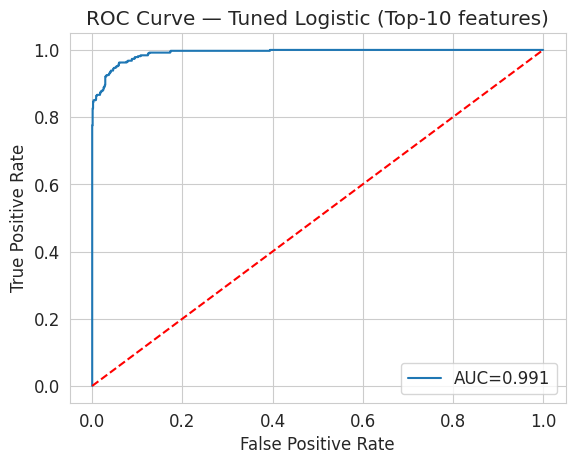

In [35]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Tuned Logistic (Top-10 features)")
plt.legend()
plt.show()

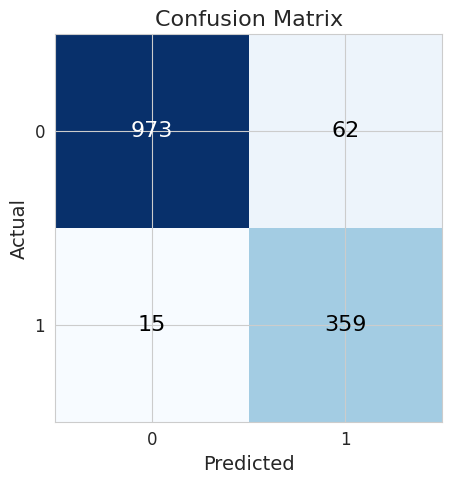

In [18]:
# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)

# === Plotting ===
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)

# Set axis ticks & labels (0 and 1 only)
plt.xticks(ticks=[0, 1], labels=["0", "1"], fontsize=12)
plt.yticks(ticks=[0, 1], labels=["0", "1"], fontsize=12)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# Text color: white if background is dark
threshold = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=16, color=color)

plt.tight_layout()
plt.show()

In [39]:
# ==== SAVE & (optional) DOWNLOAD ====
import os, json, joblib

ART_DIR = "churn_artifacts_top10"
os.makedirs(ART_DIR, exist_ok=True)

MODEL_PKL = os.path.join(ART_DIR, "logreg_top10_tuned.pkl")
INFO_JSON = os.path.join(ART_DIR, "logreg_top10_tuned_info.json")
METRICS_JSON = os.path.join(ART_DIR, "test_metrics.json")

# 1) Simpan pipeline terbaik (preprocess + model)
joblib.dump(best_top10, MODEL_PKL)
print(f"✅ Model saved at: {MODEL_PKL}")

# 2) Simpan info tuning & setup fitur
info = {
    "selected_vars": list(selected_vars),
    "num_sel": list(num_sel),
    "cat_sel": list(cat_sel),
    "best_params": grid_top10.best_params_,
    "best_cv_roc_auc": float(grid_top10.best_score_),
    "sklearn_version": sklearn.__version__,
}
with open(INFO_JSON, "w") as f:
    json.dump(info, f, indent=2)
print(f"✅ Tuning info saved at: {INFO_JSON}")

# 3) Simpan metrik test
test_metrics = {
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred, zero_division=0)),
    "recall": float(recall_score(y_test, y_pred, zero_division=0)),
    "f1": float(f1_score(y_test, y_pred, zero_division=0)),
    "roc_auc": float(roc_auc_score(y_test, y_prob)),
}
with open(METRICS_JSON, "w") as f:
    json.dump(test_metrics, f, indent=2)
print(f"✅ Test metrics saved at: {METRICS_JSON}")

# 4) (Opsional) Download kalau di Google Colab
try:
    from google.colab import files
    files.download(MODEL_PKL)
    files.download(INFO_JSON)
    files.download(METRICS_JSON)
    print("⬇️ Downloads triggered.")
except Exception as e:
    print("(Info) files.download() tidak tersedia di environment ini. Files tersimpan di folder:", ART_DIR)

✅ Model saved at: churn_artifacts_top10/logreg_top10_tuned.pkl
✅ Tuning info saved at: churn_artifacts_top10/logreg_top10_tuned_info.json
✅ Test metrics saved at: churn_artifacts_top10/test_metrics.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloads triggered.
